Name : Pranavah Varun
Reg no. : 3122237001039

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/archive

test.csv  train.csv


#1) Load the Dataset

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/archive/train.csv')
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


#2) Process the Data

In [ ]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64


2.1) Handling Missing Values

In [ ]:
# Numerical columns -> median
numerical_cols = [
    'Age', 'Income (USD)', 'Loan Amount Request (USD)',
    'Current Loan Expenses (USD)', 'Credit Score',
    'No. of Defaults', 'Property Age', 'Property Price'
]

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical columns -> mode
categorical_cols = [
    'Gender', 'Income Stability', 'Profession', 'Type of Employment',
    'Location', 'Expense Type 1', 'Expense Type 2', 'Dependents',
    'Has Active Credit Card', 'Property ID', 'Property Type',
    'Property Location', 'Co-Applicant'
]

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Others -> Drop
df = df.dropna()

print("\nAfter filling, missing values per column:")
print(df.isnull().sum())


After filling, missing values per column:
Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64


2.2) Encode categorical variables

In [ ]:
categorical_cols = [
    'Gender', 'Income Stability', 'Profession', 'Type of Employment',
    'Location', 'Expense Type 1', 'Expense Type 2', 'Dependents',
    'Has Active Credit Card', 'Property ID', 'Property Type',
    'Property Location', 'Co-Applicant'
]

df_encoded = pd.get_dummies(df, columns=categorical_cols)

print("New shape before encoding:", df.shape)
print("New shape after encoding:", df_encoded.shape)
print(df_encoded.head())

New shape before encoding: (29660, 24)
New shape after encoding: (29660, 1070)
  Customer ID               Name  Age  Income (USD)  \
0     C-36995   Frederica Shealy   56      1933.050   
1     C-33999  America Calderone   32      4952.910   
2      C-3770      Rosetta Verne   65       988.190   
3     C-26480         Zoe Chitty   65      2222.435   
4     C-23459       Afton Venema   31      2614.770   

   Loan Amount Request (USD)  Current Loan Expenses (USD)  Credit Score  \
0                   72809.58                       241.08        809.44   
1                   46837.47                       495.81        780.40   
2                   45593.04                       171.95        833.15   
3                   80057.92                       298.54        832.70   
4                  113858.89                       491.41        745.55   

   No. of Defaults  Property Age  Property Price  ...  Property Type_1  \
0                0       1933.05       119933.46  ...            

2.3) Normalize or standardize the features

In [ ]:
# Drop Non Numerical Values
df_encoded_clean = df_encoded.drop(columns=['Customer ID', 'Name'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_encoded_clean)
df_standardized = pd.DataFrame(df_standardized, columns=df_encoded_clean.columns)

print(df_standardized.head())


        Age  Income (USD)  Loan Amount Request (USD)  \
0  0.990718     -0.060998                  -0.268703   
1 -0.504632      0.228612                  -0.705356   
2  1.551474     -0.151612                  -0.726278   
3  1.551474     -0.033246                  -0.146842   
4 -0.566939      0.004380                   0.421433   

   Current Loan Expenses (USD)  Credit Score  No. of Defaults  Property Age  \
0                    -0.660921      0.992841        -0.490710     -0.060691   
1                     0.393487      0.578518        -0.490710      0.228949   
2                    -0.947071      1.331119        -0.490710     -0.151314   
3                    -0.423076      1.324699         2.037863     -0.032857   
4                     0.375274      0.081301         2.037863      0.004694   

   Property Price  Loan Sanction Amount (USD)  Gender_F  ...  Property Type_1  \
0       -0.126312                    0.144293  1.007581  ...        -0.596146   
1       -0.823622         

#3) Perform Exploratory Data Analysis

3.1) Histogram

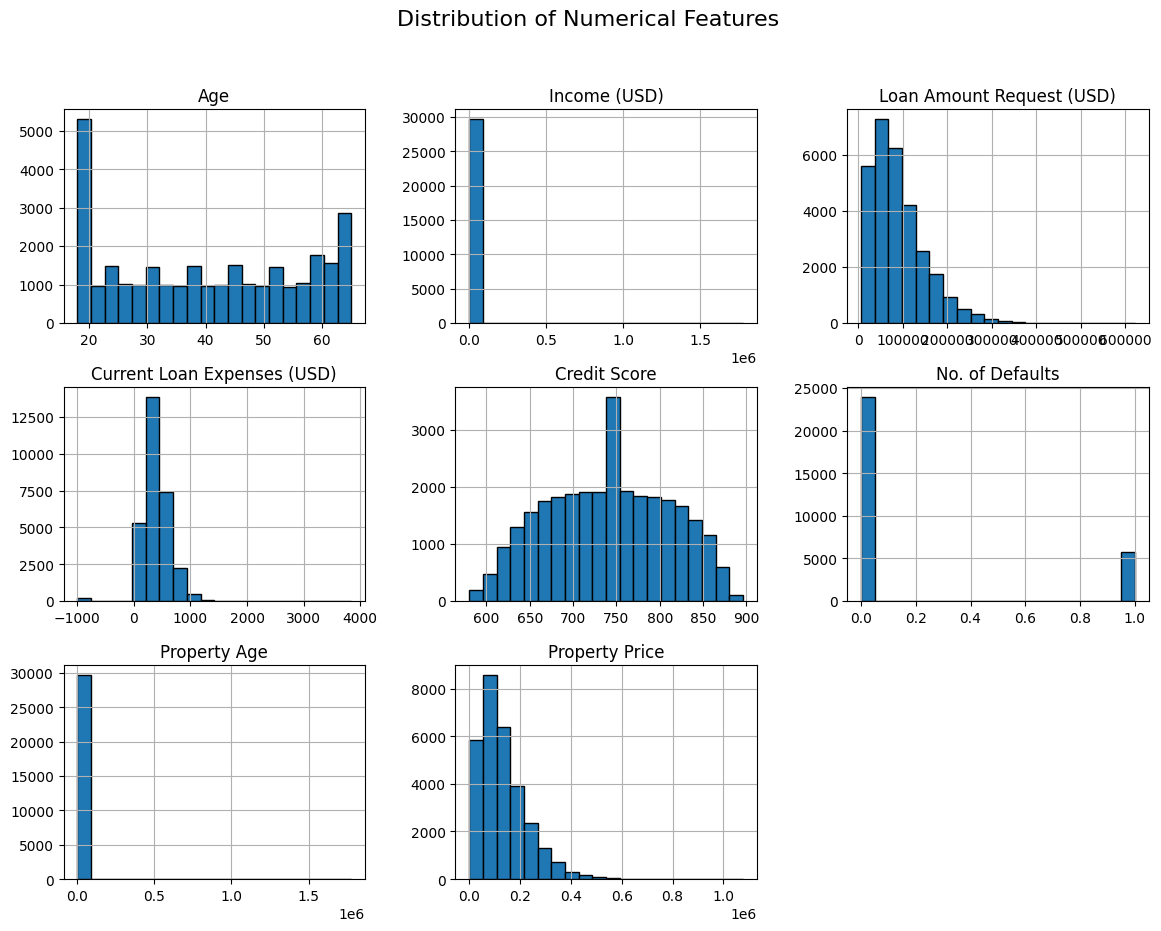

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [
    'Age', 'Income (USD)', 'Loan Amount Request (USD)',
    'Current Loan Expenses (USD)', 'Credit Score',
    'No. of Defaults', 'Property Age', 'Property Price'
]

df[numerical_cols].hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

3.2) Scatter Plot

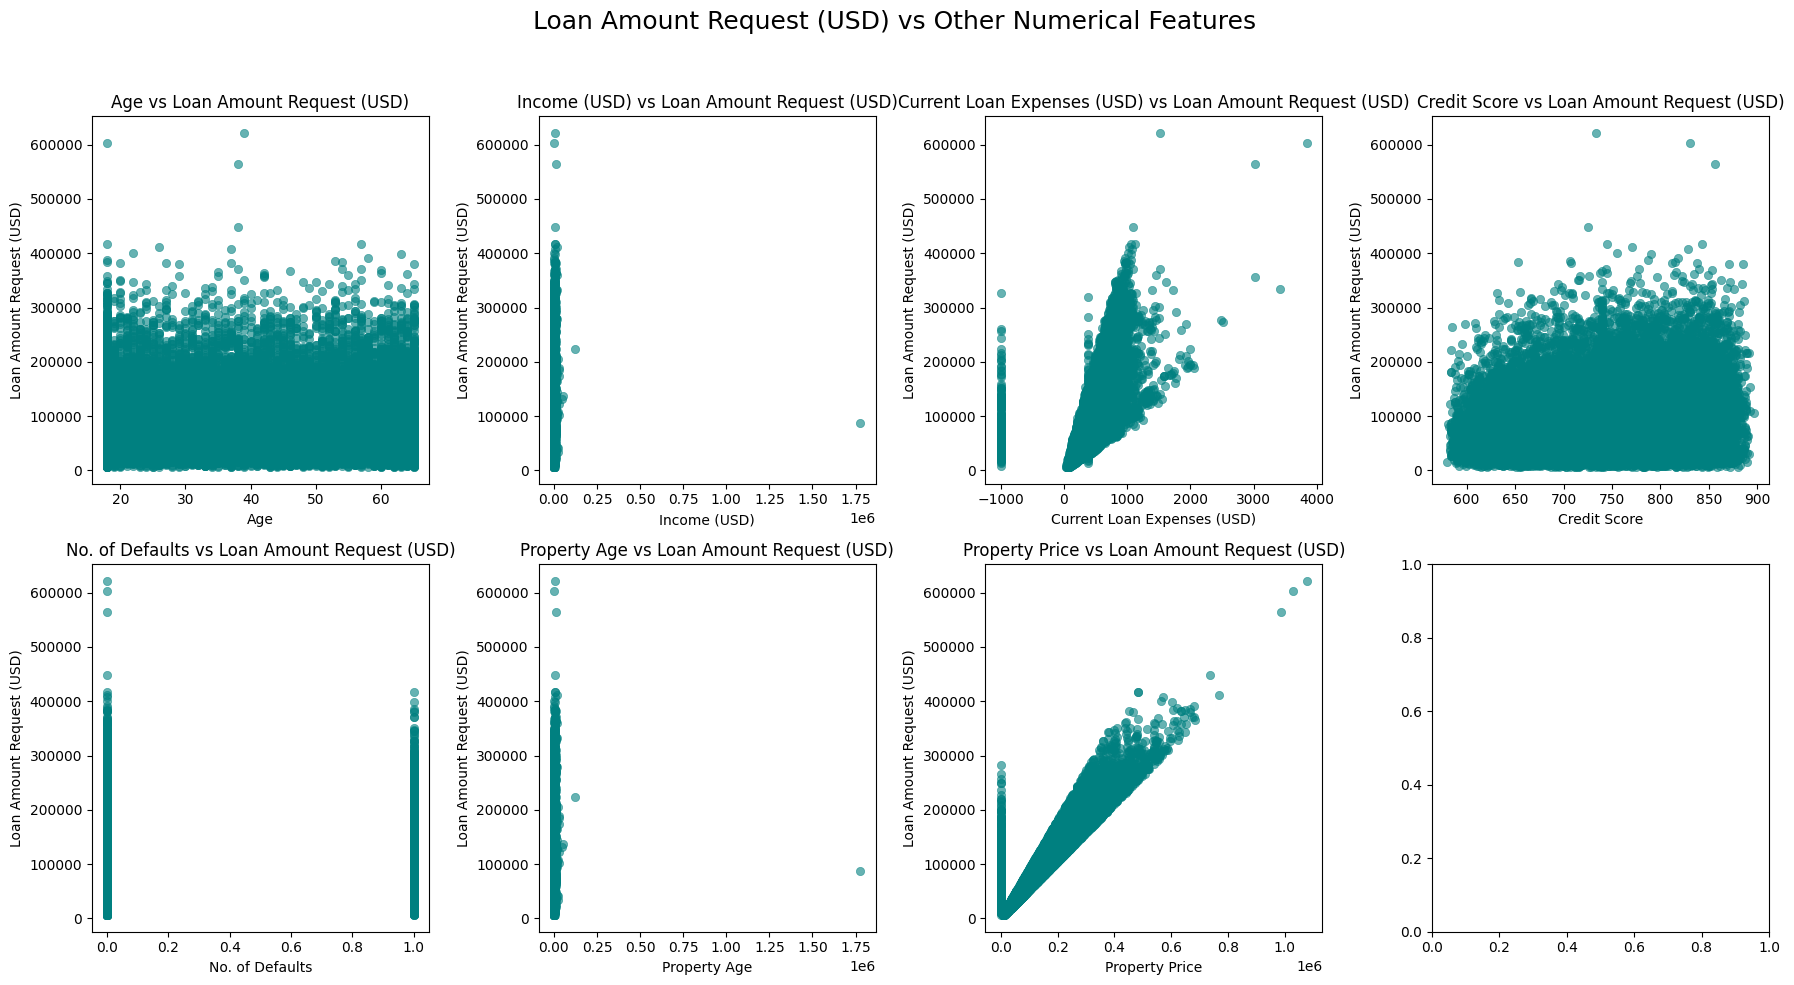

In [ ]:
target = 'Loan Amount Request (USD)'
features = [col for col in numerical_cols if col != target]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
fig.suptitle(f'{target} vs Other Numerical Features', fontsize=18)

axes = axes.flatten()

for i, col in enumerate(features):
    sns.scatterplot(ax=axes[i], x=df[col], y=df[target], color='teal', alpha=0.6, edgecolor=None)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel(target)
    axes[i].set_title(f'{col} vs {target}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


3.3) Correlation Heatmap

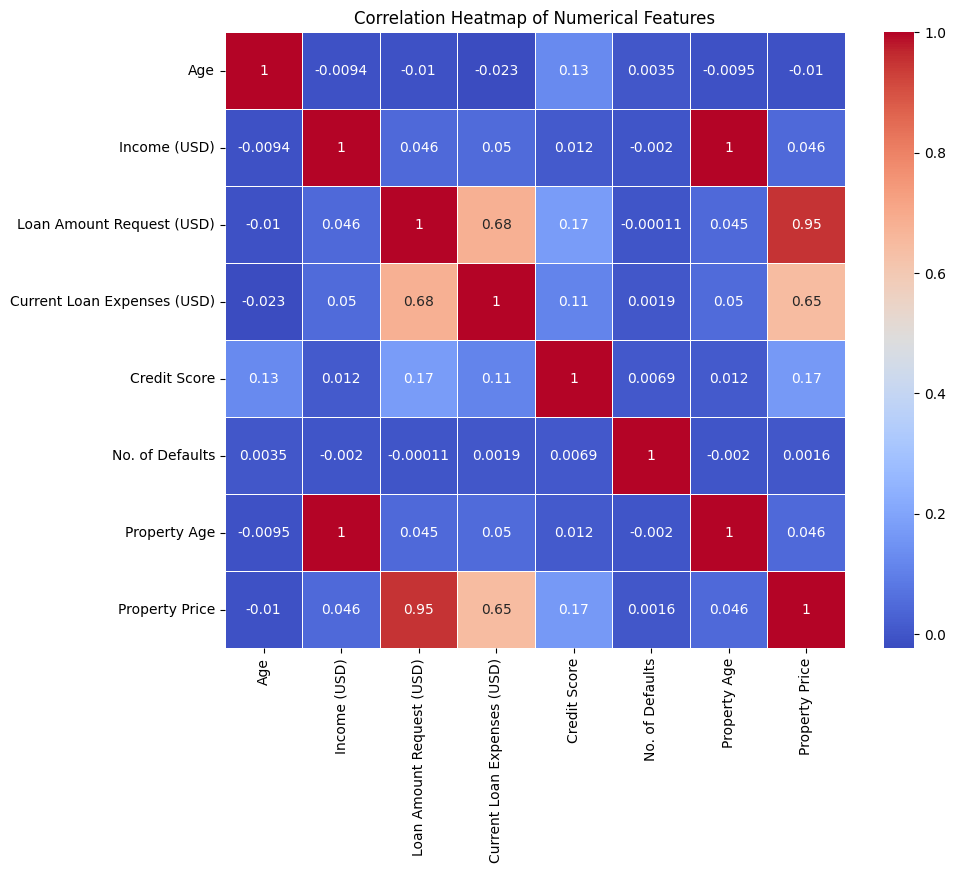

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#4) Apply feature engineering techniques

In [ ]:
import numpy as np

df_fe = df.copy()

# Create new features
df_fe['Debt_Income_Ratio'] = df_fe['Current Loan Expenses (USD)'] / df_fe['Income (USD)']

df_fe['Many_Dependents'] = df_fe['Dependents'].apply(lambda x: 1 if str(x).strip() in ['3+', '4', '5'] else 0)

df_fe['Property_Age_Bucket'] = pd.cut(df_fe['Property Age'], bins=[0, 5, 20, 100], labels=['New', 'Mid', 'Old'])

# Log transform skewed features
df_fe['Log_Income'] = np.log1p(df_fe['Income (USD)'])

df_fe['Log_LoanAmount'] = np.log1p(df_fe['Loan Amount Request (USD)'])

# Combine features
df_fe['Has_Coapplicant'] = df_fe['Co-Applicant'].apply(lambda x: 0 if str(x).strip().lower()=='no' else 1)

# Drop irrelevant columns
df_fe = df_fe.drop(columns=['Customer ID', 'Name'])

# Encode new categorical feature
df_fe = pd.get_dummies(df_fe, columns=['Property_Age_Bucket'])

print(df_fe.head())

  Gender  Age  Income (USD) Income Stability Profession  \
0      F   56      1933.050              Low    Working   
1      M   32      4952.910              Low    Working   
2      F   65       988.190             High  Pensioner   
3      F   65      2222.435             High  Pensioner   
4      F   31      2614.770              Low    Working   

      Type of Employment    Location  Loan Amount Request (USD)  \
0            Sales staff  Semi-Urban                   72809.58   
1               Laborers  Semi-Urban                   46837.47   
2               Laborers  Semi-Urban                   45593.04   
3               Laborers       Rural                   80057.92   
4  High skill tech staff  Semi-Urban                  113858.89   

   Current Loan Expenses (USD) Expense Type 1  ... Property Price  \
0                       241.08              N  ...      119933.46   
1                       495.81              N  ...       54791.00   
2                       171.95     

#5) Split the Dataset

In [ ]:
categorical_cols = [
    'Gender', 'Income Stability', 'Profession', 'Type of Employment',
    'Location', 'Expense Type 1', 'Expense Type 2', 'Dependents',
    'Has Active Credit Card', 'Property ID', 'Property Type',
    'Property Location', 'Co-Applicant'
]
df_fe_encoded = pd.get_dummies(df_fe, columns=categorical_cols)

from sklearn.model_selection import train_test_split

target = 'Loan Amount Request (USD)'
X = df_fe_encoded.drop(columns=[target])
y = df_fe_encoded[target]

# First split: 80% train+val, 20% test → 0.8 trainval, 0.2 test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Second split: 75% train, 25% val → 0.6 train, 0.2 val
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=42)

print(f"Train: {X_train.shape}")
print(f"Validation: {X_val.shape}")
print(f"Test: {X_test.shape}")


Train: (17796, 1075)
Validation: (5932, 1075)
Test: (5932, 1075)


#6) Train the Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


#7) Evaluate the model

In [ ]:
# Predict on validation and test sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Validation -> predicted vs actual
print("\nValidation set: first 10 actual vs predicted")
for actual, pred in zip(y_val[:10], y_val_pred[:10]):
    print(f"Actual: {actual:.2f} | Predicted: {pred:.2f}")

# Test -> predicted vs actual
print("\nTest set: first 10 actual vs predicted")
for actual, pred in zip(y_test[:10], y_test_pred[:10]):
    print(f"Actual: {actual:.2f} | Predicted: {pred:.2f}")



Validation set: first 10 actual vs predicted
Actual: 26009.17 | Predicted: 18169.80
Actual: 132855.64 | Predicted: 142111.22
Actual: 136882.87 | Predicted: 141165.83
Actual: 185046.68 | Predicted: 180749.81
Actual: 151344.83 | Predicted: 161710.22
Actual: 89733.04 | Predicted: 75984.37
Actual: 92008.74 | Predicted: 104175.59
Actual: 38795.02 | Predicted: 29470.10
Actual: 61810.46 | Predicted: 75110.29
Actual: 28732.23 | Predicted: 22661.64

Test set: first 10 actual vs predicted
Actual: 84001.94 | Predicted: 77629.14
Actual: 77944.47 | Predicted: 89784.68
Actual: 14015.89 | Predicted: 1653.80
Actual: 122439.74 | Predicted: 117409.29
Actual: 55111.86 | Predicted: 56304.86
Actual: 150026.87 | Predicted: 161876.64
Actual: 19640.68 | Predicted: 3627.26
Actual: 26181.02 | Predicted: 25320.53
Actual: 16673.81 | Predicted: 739.06
Actual: 52890.77 | Predicted: 50221.16


#8) Measure performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Validation metrics
mae_val = mean_absolute_error(y_val, y_val_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)

print("✅ Validation set metrics:")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Mean Squared Error (MSE): {mse_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"R² Score: {r2_val:.4f}")

# Test metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\n✅ Test set metrics:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R² Score: {r2_test:.4f}")


✅ Validation set metrics:
Mean Absolute Error (MAE): 10118.43
Mean Squared Error (MSE): 211090925.52
Root Mean Squared Error (RMSE): 14528.97
R² Score: 0.9407

✅ Test set metrics:
Mean Absolute Error (MAE): 10006.04
Mean Squared Error (MSE): 214528533.92
Root Mean Squared Error (RMSE): 14646.79
R² Score: 0.9403


#9) Visualize the results

9.1) Actual vs Predicted Plots

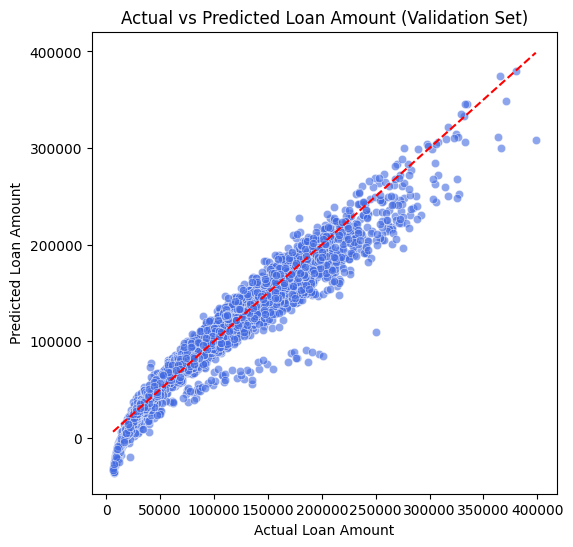

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_val, y=y_val_pred, alpha=0.6, color='royalblue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')
plt.xlabel('Actual Loan Amount')
plt.ylabel('Predicted Loan Amount')
plt.title('Actual vs Predicted Loan Amount (Validation Set)')
plt.show()

9.2) Residual Plot

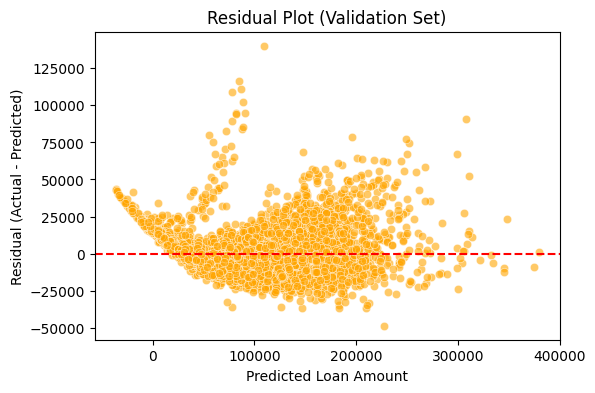

In [ ]:
residuals_val = y_val - y_val_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_val_pred, y=residuals_val, alpha=0.6, color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Loan Amount')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot (Validation Set)')
plt.show()

9.3) Bar Plot of Feature Coefficients

/tmp/ipython-input-18-2976367351.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_coef_df, x='Coefficient', y='Feature', palette='viridis')


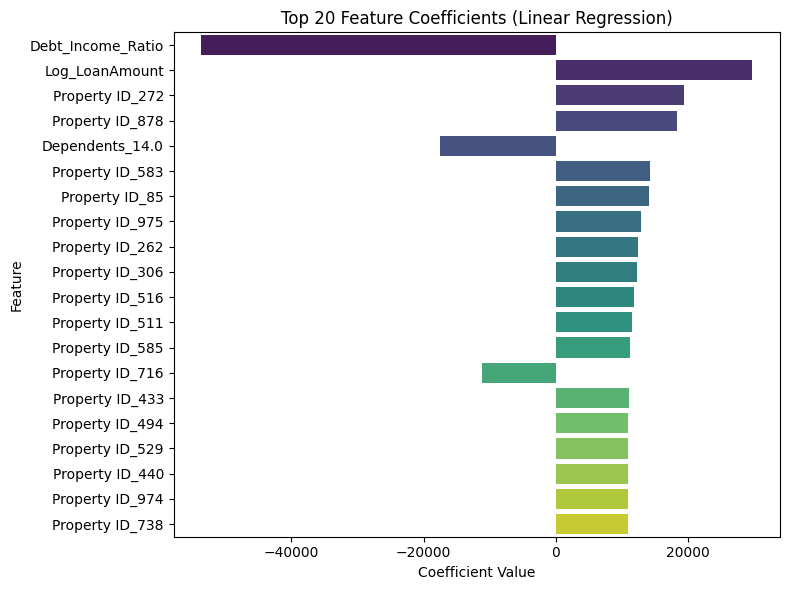

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()

top_n = 20
top_coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(top_n)

plt.figure(figsize=(8,6))
sns.barplot(data=top_coef_df, x='Coefficient', y='Feature', palette='viridis')
plt.title(f'Top {top_n} Feature Coefficients (Linear Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

9.4) Boxplot

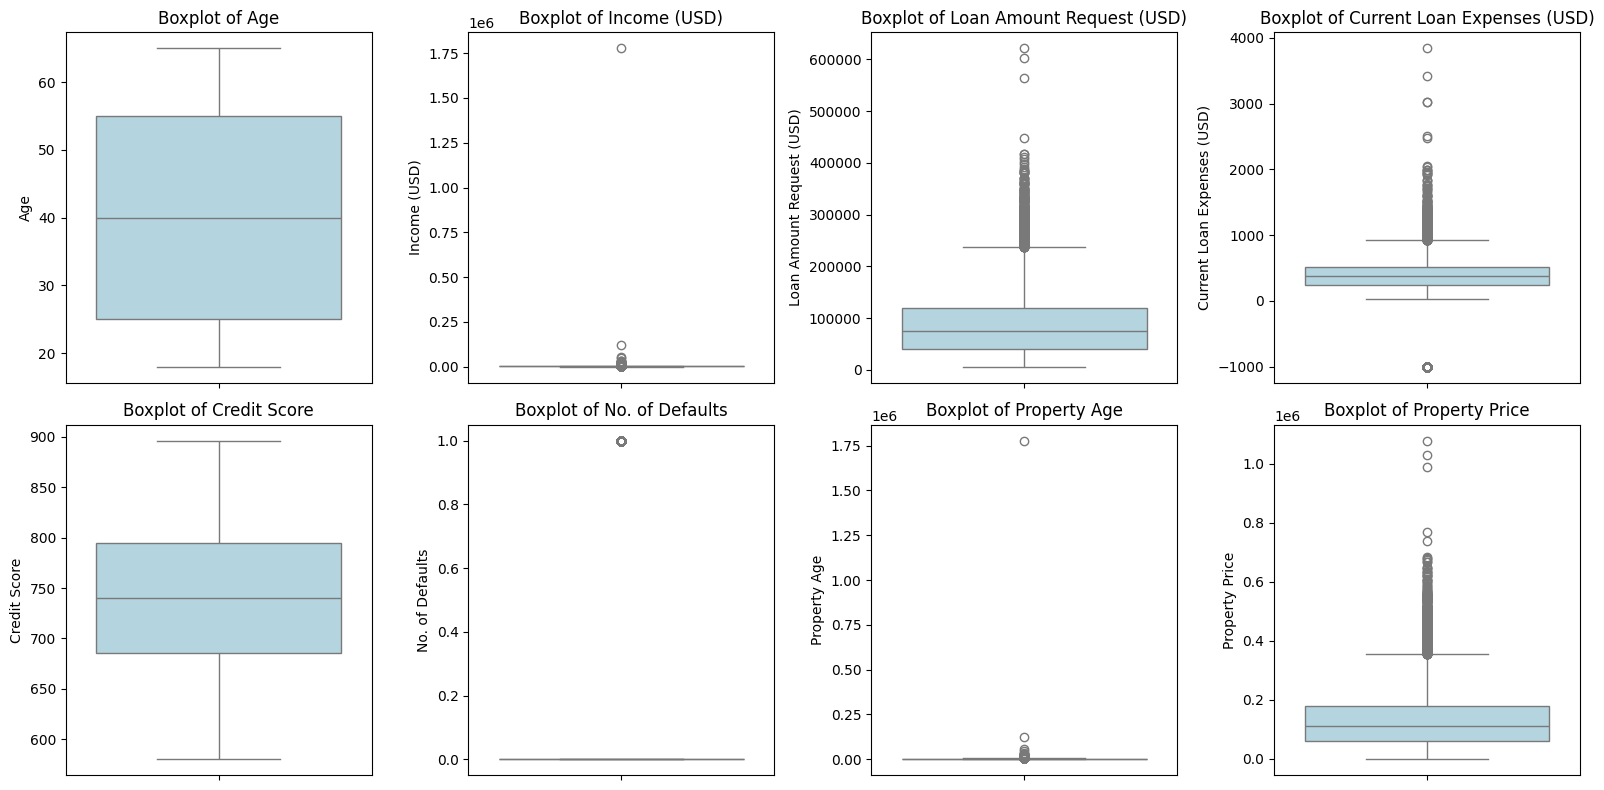

In [ ]:
numerical_cols = [
    'Age', 'Income (USD)', 'Loan Amount Request (USD)',
    'Current Loan Expenses (USD)', 'Credit Score',
    'No. of Defaults', 'Property Age', 'Property Price'
]

plt.figure(figsize=(16,8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()
